# Practice 2

In this excercise, I analyzed a dataframe containing the effective mass and thermoelectric properties of 8924 compounds in The Materials Project database. The values were calculated through the BoltzTraP software package using GGA-PBE or GGA+U density functional theory calculations. The reported properties are for a temperature of 300 Kelvin and a carrier concentration of 1e18 1/cm3. With the aim of applying feature extraction and dimensionality reduction. In the dataset, I only have continuous values. Therefore, I can only apply feature extractions that work with continuous values. The data exploratory anal

In [1]:
#Import libraries
import pandas as pd
from matminer.datasets import load_dataset
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
#Load dataset
df = load_dataset('boltztrap_mp') 
df.head()

,mpid,pf_n,pf_p,s_n,s_p,formula,m_n,m_p,structure
0,mp-10070,0.865,0.0125,-421.0,760.0,BaAg(PO3)3,0.578,72.800,"[[ 0.08245398 10.58009491 11.61923254] O, [3.1..."
1,mp-10086,1.050,0.6440,-393.0,567.0,YSF,0.541,4.020,"[[2.84699546 0.94899849 0. ] F, [0.9489..."
2,mp-10096,0.977,0.4200,-305.0,471.0,Na3Sr3GaP4,0.270,1.020,"[[-2.8085287 7.06608376 1.25800196] Na, [1...."
3,mp-10103,0.889,0.0257,-416.0,871.0,YbLiAlF6,0.548,20.300,"[[2.52287112 1.45658029 7.18290524] Li, [-2.85..."
4,mp-10155,0.719,1.5700,-496.0,510.0,P2Ir,1.160,0.667,"[[0.86371064 5.14343422 4.80450637] P, [4.5512..."


In [3]:
df1=df.iloc[0:100, [1,2,3,4,6,7]] #Here I only selected 100 rows because mi computer dont support work with more  jeje

## Dataset exploratory

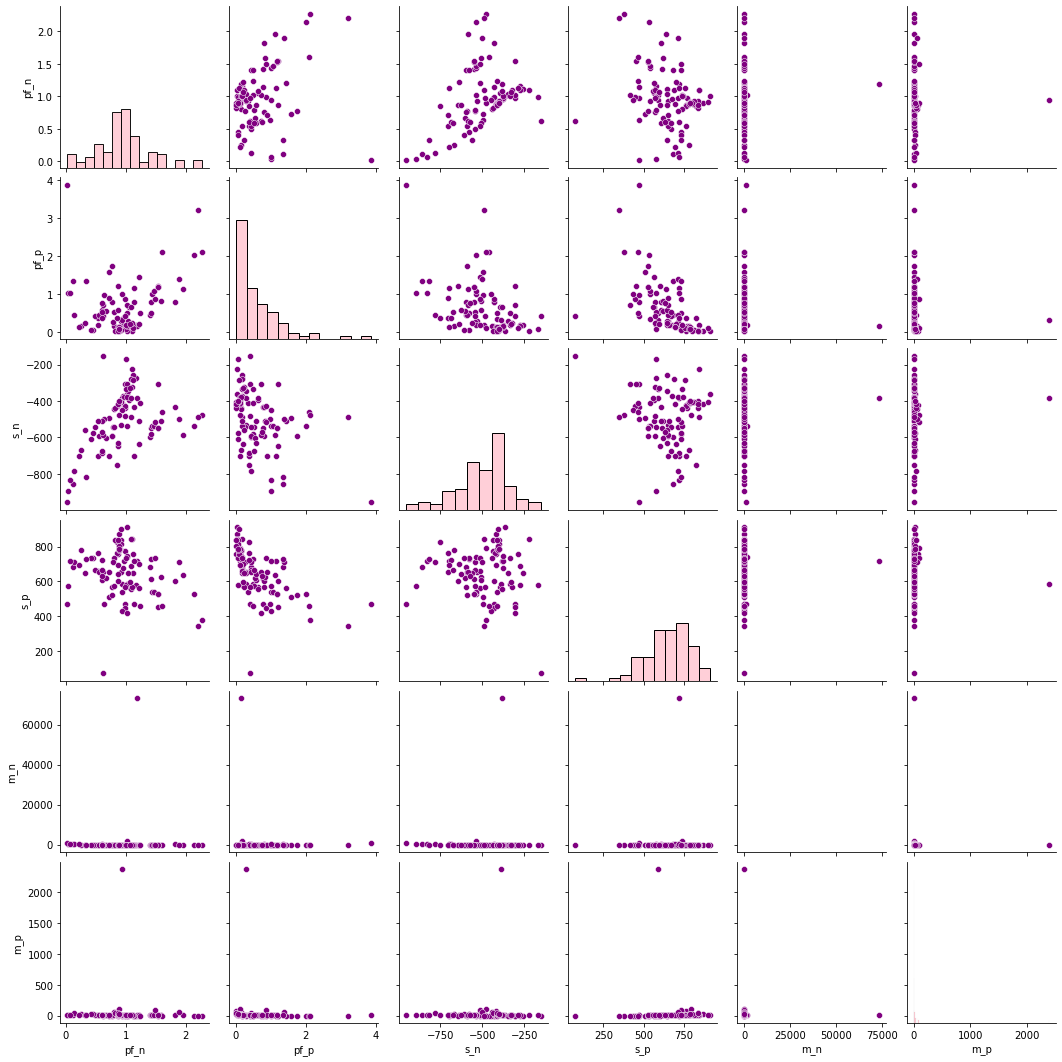

In [4]:
sns.pairplot(df1,
            plot_kws={'color':'purple','marker':'o'}
            ,diag_kws={'color':'pink'})
plt.show()

In these pair plots, we can observe the points between two different characteristics in a 2D representation, and in the diagonal, the bars show the distribution for the characteristic values for each element of the data set.

In [4]:
df.describe()

,pf_n,pf_p,s_n,s_p,m_n,m_p
count,8.924000e+03,8924.000000,8924.000000,8924.000000,8.924000e+03,8.924000e+03
mean,6.662679e-01,0.299013,-545.180536,676.105806,1.483161e+04,2.022671e+04
std,4.668595e-01,0.434866,163.648598,142.910040,7.967115e+05,1.235763e+06
min,8.930000e-07,0.000015,-1120.000000,-691.000000,1.590000e-02,1.600000e-02
25%,2.670000e-01,0.064100,-676.000000,636.000000,5.767500e-01,3.710000e+00
50%,7.100000e-01,0.166000,-549.000000,703.000000,1.790000e+00,1.100000e+01
75%,9.360000e-01,0.373000,-418.000000,756.000000,1.380000e+01,4.172500e+01
max,6.710000e+00,7.290000,655.000000,1090.000000,6.650000e+07,1.140000e+08


A general statistic shows the mean value of each characteristic, the number of elements, and the mean, maximum and minimum values for each column.  

/tmp/ipykernel_2599/2696548523.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


<AxesSubplot:>

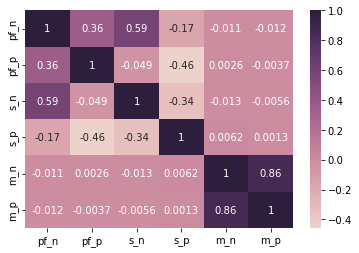

In [32]:
cor = df.corr()
sns.heatmap(cor, annot = True,cmap=sns.cubehelix_palette(as_cmap=True))

This map of "heat" shows that correlation between two pairs of variables, two pairs of variables with strong correlation, close to one, means that these two variables can describe one from the other, the pairs of variables more correlate are: p-type power factor (pf_p) versus n-type thermoelectric power factor (pf_n), pf_n versus n-type Seebeck coefficient (s_n) and p-type/valence band effective mass (m_p) versus m_n. These provide a guide to selecting only a few characteristics. 

# Features Extraction 

## Filter methods

#### Low variance

In [21]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.5 * (1 - .5)))
X_new = sel.fit_transform(df2)
print(X_new.shape)

(8924, 3)


We can work with only three features of the dataset, but we are unclear about which specific features they are.

#### Univariate feature selection

In [9]:
df2=df.iloc[:, [1,2,3,4,6]]
df3=df.iloc[:, [7]]
df1=df.iloc[:, [1,2,3,4,6,7]]
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
print(df1.shape)
X_new = SelectKBest(f_classif, k=2).fit_transform(df2, df3)
print(X_new.shape)

(8924, 6)


/home/jair/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(8924, 2)


We can describe the data set with only two characteristics 

## Wrapper methods


#### Forward selection

In [18]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

df4=df.iloc[:, [1,2,3,4]]
df5=df.iloc[:, [6,7]]
df=df.iloc[:,[1,2,3,4,6,7]]

lr = LinearRegression()

ffs = SequentialFeatureSelector(lr, k_features='best', forward = True)
ffs.fit(df4, df5)

features = list(ffs.k_feature_names_)
print(features)

['pf_p', 's_n', 's_p']


The dataset can be described using only three characteristics, which effectively reduces the number of dimensions from six to three.


#### Backward elimination

In [23]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

bfs = SequentialFeatureSelector(lr, k_features='best', forward = False)
bfs.fit(df4, df5)

features = list(bfs.k_feature_names_)
print(features)

['pf_p', 's_n', 's_p']


The backward feature selection process verifies that we can operate with just three aspects of the model.

# Dimensionality reduction

#### PCA

    pf_n    pf_p    s_n    s_p    m_n     m_p
0  0.865  0.0125 -421.0  760.0  0.578  72.800
1  1.050  0.6440 -393.0  567.0  0.541   4.020
2  0.977  0.4200 -305.0  471.0  0.270   1.020
3  0.889  0.0257 -416.0  871.0  0.548  20.300
4  0.719  1.5700 -496.0  510.0  1.160   0.667


<AxesSubplot:>

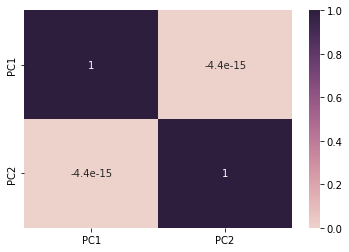

In [30]:
from sklearn.preprocessing import StandardScaler # to standardize the features
from sklearn.decomposition import PCA # to apply PCA

df = load_dataset('boltztrap_mp')
df1=df.iloc[:, [1,2,3,4,6,7]] #Selecting only a few columns
print(df1.head())
#Standardize the feautures
scalar = StandardScaler() 
scaled_data=pd.DataFrame(scalar.fit_transform(df1))
scaled_data.head()
#Applying PCA
#Number of principal components
pca=PCA(n_components=2)
pca.fit(scaled_data) #finds a line that best fits a collection of dataset
data_pca=pca.transform(scaled_data) #Applying PCA transform
data_pca=pd.DataFrame(data_pca,
                     columns=['PC1','PC2']) #Transform PCA in a dataframe
sns.heatmap(data_pca.corr(),annot=True,cmap=sns.cubehelix_palette(as_cmap=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8924 entries, 0 to 8923
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     8924 non-null   float64
 1   PC2     8924 non-null   float64
dtypes: float64(2)
memory usage: 139.6 KB
None


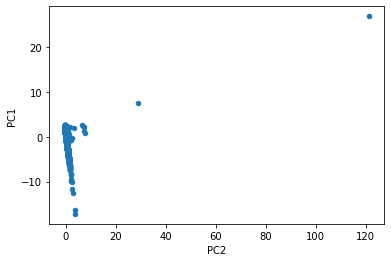

In [43]:
data_pca.plot.scatter(xlabelx='PC2',y='PC1',) #scattering de datos
print(data_pca.info())

The above heatmap clearly depicts that there is no correlation between various obtained principal components (PC1 and PC2). Thus, we have moved from higher dimensional feature space to a lower-dimensional feature space while ensuring that there is no correlation between the so obtained PCs is minimum. Hence, we have accomplished the objectives of PCA.



# Conclusions

The filter methods for feature extraction indicate that only two characteristics of the dataset can be used, but do not specify which ones. However, they provide guidance on reducing the number of features. When using wrapper methods to determine feature extraction, I utilize two distinct methods: forward selection and backward elimination. These methods indicate that we can effectively operate with only three variables: 'pf_p', 's_n', and 's_p'. This conclusion is consistent with a correlation matrix that demonstrates a high degree of correlation between these variables. Ultimately, this approach produces the best possible results. Finally, principal component analysis (PCA) was applied to reduce the dimensionality from six features to two features. 